# 作業目標:

    使用CIFAR100, 數據集變大的影響
    
    
# 作業重點:¶

   了解 CIFAR100 跟 CIFAR10 數據及差異


In [1]:
import numpy
from keras.datasets import cifar100
import numpy as np
np.random.seed(100)

Using TensorFlow backend.


# 資料準備

In [2]:
(x_img_train,y_label_train), \
(x_img_test, y_label_test)=cifar100.load_data()

In [3]:
print('train:',len(x_img_train))
print('test :',len(x_img_test))

train: 50000
test : 10000


In [4]:
# 查詢檔案維度資訊
x_img_train.shape

(50000, 32, 32, 3)

In [5]:
# 查詢檔案維度資訊
y_label_train.shape

(50000, 1)

In [16]:
y_label_train.min()

0

In [6]:
# 查詢檔案維度資訊
x_img_test.shape

(10000, 32, 32, 3)

In [7]:
# 查詢檔案維度資訊
y_label_test.shape

(10000, 1)

In [40]:
#針對物件圖像數據集的類別編列成字典
#Superclass有19個，小分類總共有100個，dict要100個
#            {0:"aquatic",1:"fish",2:"flowers",3:"food",4:"fruit and vegetables",
#             5:"household electrical devices",6:"household",7:"insects",8:"large carnivores",9:"large man-made outdoor things",
#             10:"large natural outdoor scenes",11:"large omnivores and herbivores",12:"medium-sized mammals",
#             13:"non-insect invertebrates",14:"people",15:"reptiles",16:"small mammals",
#             17:"trees",18:"vehicles 1",19:"vehicles 2"}
keys = list(range(0,100))
values = ['beaver','dolphin','otter','seal','whale',
          'aquarium','fish','flatfish','ray','shark','trout',
          'orchids','poppies','roses','sunflowers','tulips',
          'bottles','bowls','cans','cups','plates',
          'apples','mushrooms','oranges','pears','sweet peppers',
          'clock','computer keyboard','lamp','telephone','television',
          'bed','chair','couch','table','wardrobe',
          'bee','beetle','butterfly','caterpillar','cockroach',
          'bear','leopard','lion','tiger','wolf',
          'bridge','castle','house', 'road', 'skyscraper', 
          'cloud', 'forest', 'mountain', 'plain, sea', 
          'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo', 
          'fox', 'porcupine', 'possum', 'raccoon', 'skunk', 
          'crab', 'lobster', 'snail', 'spider', 'worm', 
          'baby', 'boy', 'girl', 'man', 'woman', 
          'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle', 
          'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel', 
          'maple', 'oak', 'palm', 'pine', 'willow', 
          'bicycle', 'bus', 'motorcycle', 'pickup truck', 'train', 
          'lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor']
label_dict = dict(zip(keys, values))

In [43]:
#導入影像列印模組
import matplotlib.pyplot as plt

#宣告一個影像標記的函數
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=100):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>100: num=100 
    for i in range(0, num):
        ax=plt.subplot(10,10, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

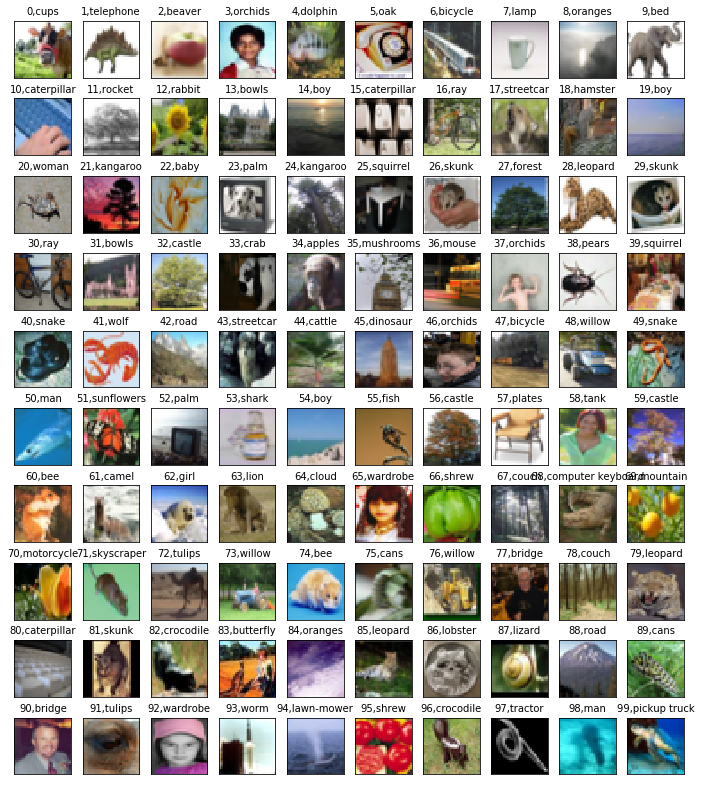

In [44]:
plot_images_labels_prediction(x_img_train,y_label_train,[],0)

In [45]:
print('x_img_test:',x_img_test.shape)
print('y_label_test :',y_label_test.shape)

x_img_test: (10000, 32, 32, 3)
y_label_test : (10000, 1)


# Image normalize 

In [46]:
x_img_train[0][0][0]

array([255, 255, 255], dtype=uint8)

In [47]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [48]:
x_img_train_normalize[0][0][0]

array([1., 1., 1.], dtype=float32)

# 轉換label 為OneHot Encoding

In [49]:
y_label_train.shape

(50000, 1)

In [50]:
y_label_train[:5]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1]])

In [51]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [52]:
y_label_train_OneHot.shape

(50000, 100)

In [53]:
y_label_train_OneHot[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.